<a href="https://colab.research.google.com/github/shanu1981/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California House Price Prediction.ipynb

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("housing.csv")

In [6]:
data.dropna(inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8072,-118.17,33.82,52.0,2539.0,497.0,1152.0,488.0,4.1354,NEAR OCEAN,268200.0
1789,-122.36,37.93,17.0,1258.0,254.0,885.0,229.0,3.0500,NEAR BAY,121600.0
19841,-119.10,36.43,24.0,1039.0,190.0,643.0,193.0,2.6711,INLAND,71300.0
12388,-116.44,33.77,18.0,4872.0,1110.0,955.0,656.0,2.2439,INLAND,97500.0
10897,-117.84,33.73,20.0,2572.0,732.0,1534.0,669.0,2.4211,<1H OCEAN,175000.0
...,...,...,...,...,...,...,...,...,...,...
2184,-120.10,36.66,19.0,2020.0,416.0,1341.0,360.0,1.7000,INLAND,69000.0
5617,-118.26,33.79,42.0,1162.0,264.0,1044.0,241.0,3.5488,<1H OCEAN,205600.0
17381,-120.38,34.96,9.0,2813.0,492.0,1144.0,490.0,4.0431,<1H OCEAN,226800.0
2698,-115.38,32.82,38.0,1892.0,394.0,1175.0,374.0,1.9939,INLAND,65800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

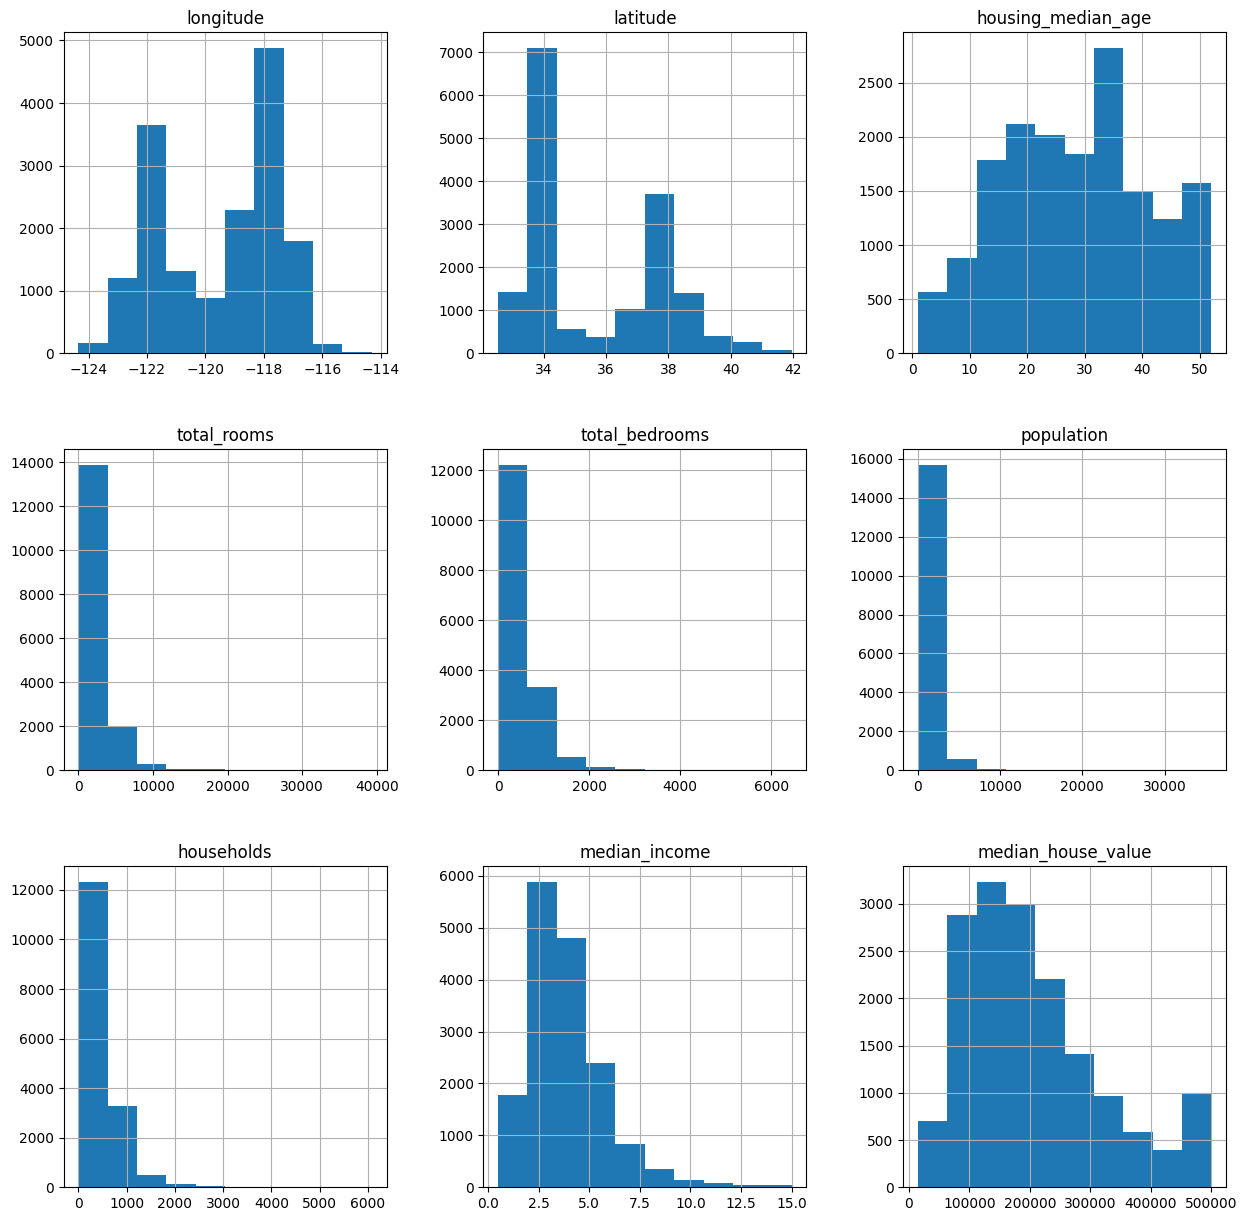

In [11]:
train_data.hist(figsize=(15,15))

<Axes: >

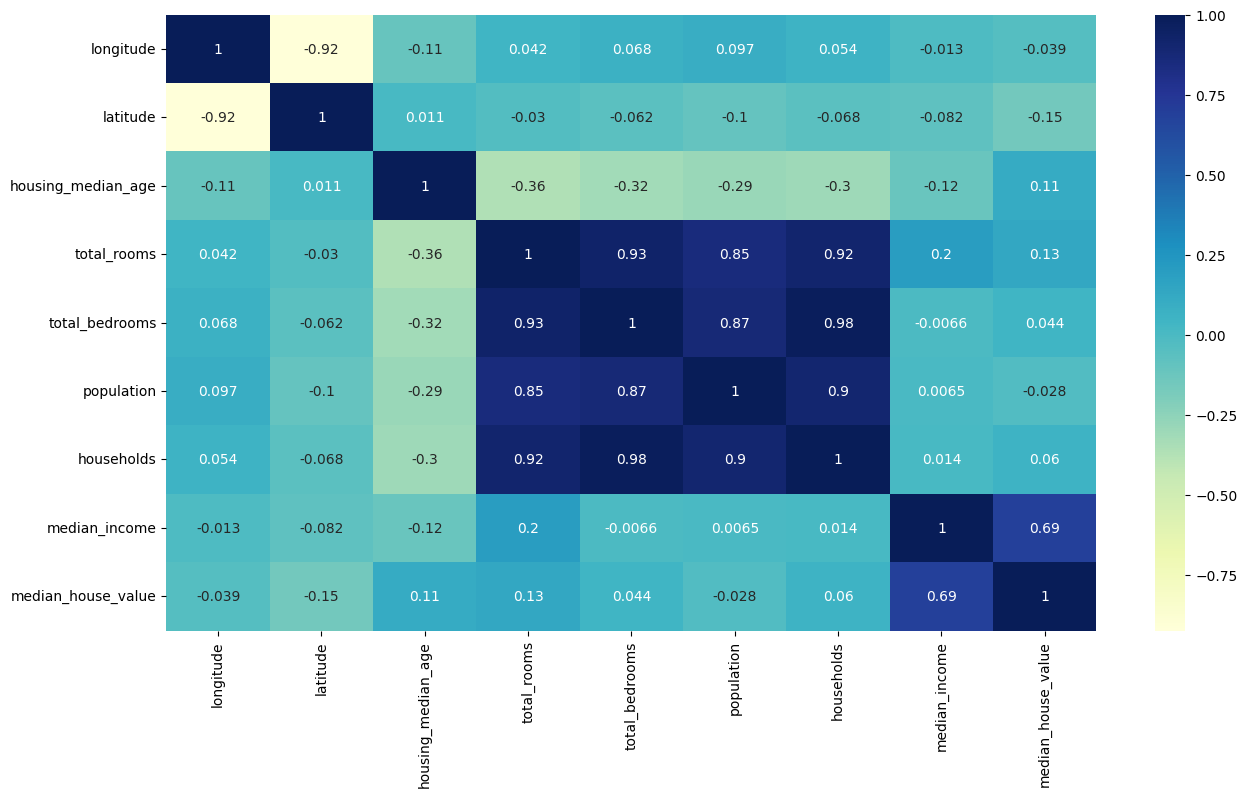

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

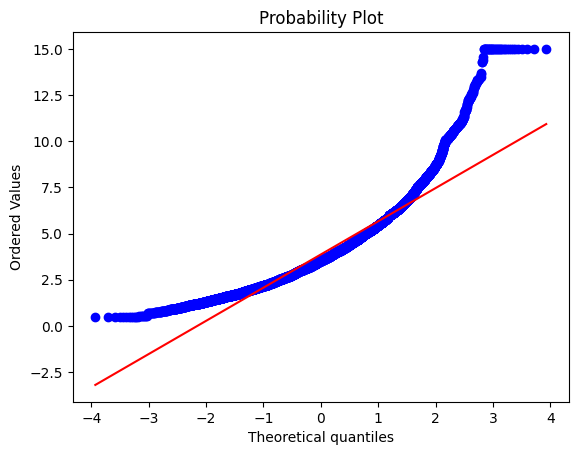

In [13]:
#Q-Q plot
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(train_data["median_income"], dist="norm", plot=plt)
plt.show()


In [14]:
#Shapiro Wilk test
from scipy.stats import shapiro
stat, p = shapiro(train_data["median_income"])
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=0.895, p=0.000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16346.
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

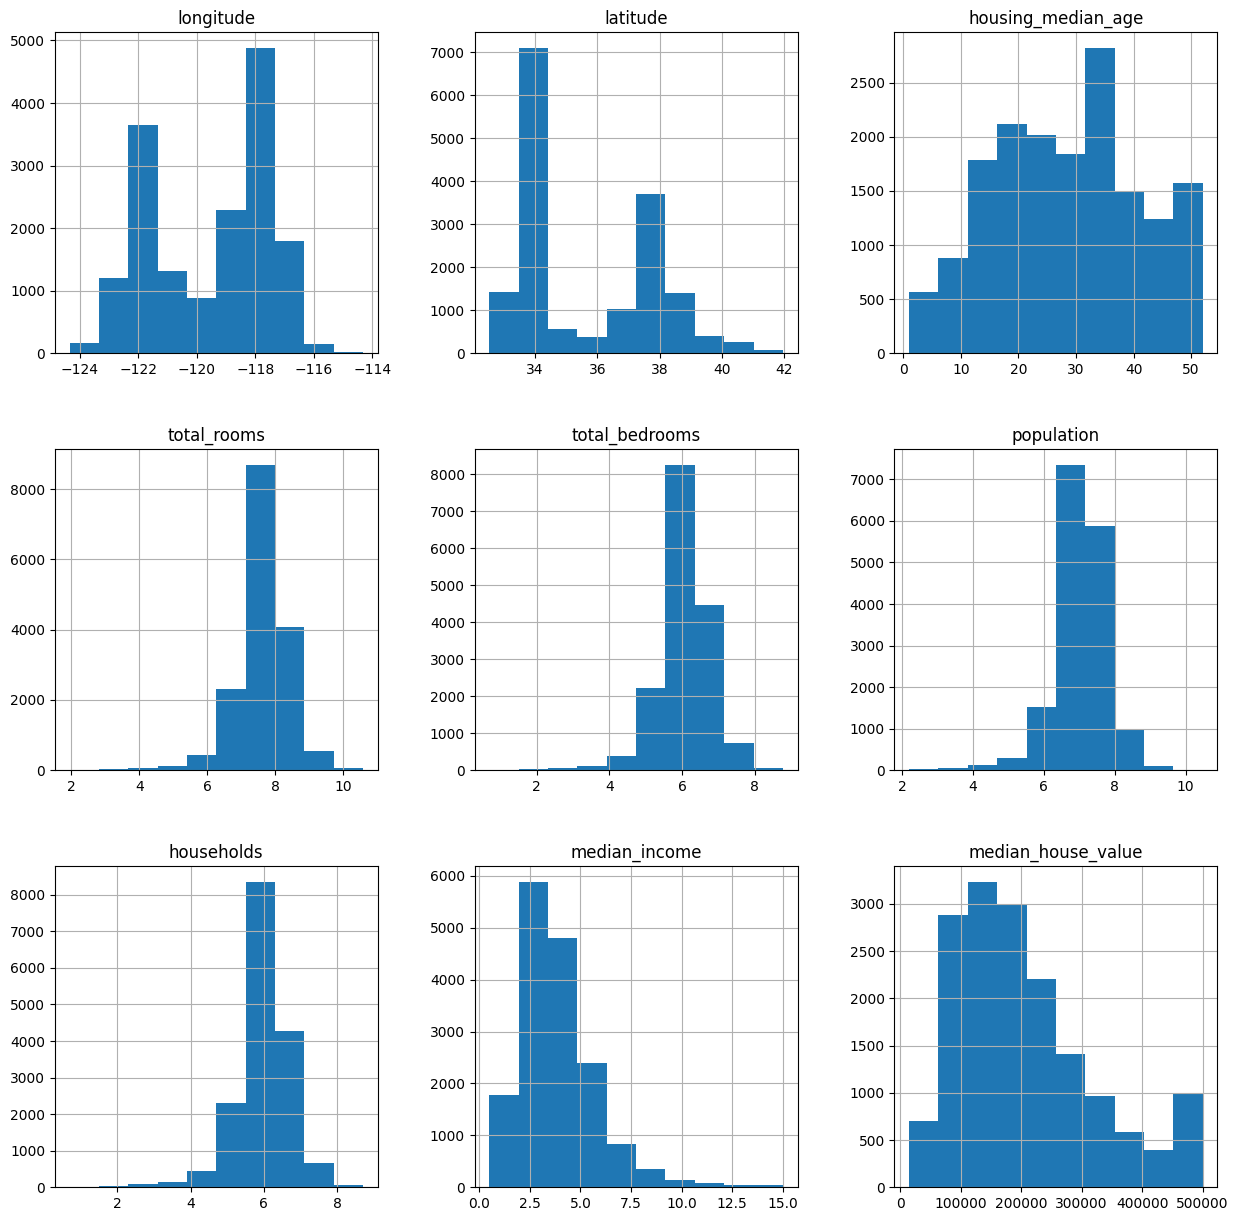

In [16]:
train_data.hist(figsize=(15,15))

In [17]:
train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8072,-118.17,33.82,52.0,7.839919,6.210600,7.050123,6.192362,4.1354,268200.0,False,False,False,False,True
1789,-122.36,37.93,17.0,7.138073,5.541264,6.786717,5.438079,3.0500,121600.0,False,False,False,True,False
19841,-119.10,36.43,24.0,6.946976,5.252273,6.467699,5.267858,2.6711,71300.0,False,True,False,False,False
12388,-116.44,33.77,18.0,8.491465,7.013016,6.862758,6.487684,2.2439,97500.0,False,True,False,False,False
10897,-117.84,33.73,20.0,7.852828,6.597146,7.336286,6.507278,2.4211,175000.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,-120.10,36.66,19.0,7.611348,6.033086,7.201916,5.888878,1.7000,69000.0,False,True,False,False,False
5617,-118.26,33.79,42.0,7.058758,5.579730,6.951772,5.488938,3.5488,205600.0,True,False,False,False,False
17381,-120.38,34.96,9.0,7.942362,6.200509,7.043160,6.196444,4.0431,226800.0,True,False,False,False,False
2698,-115.38,32.82,38.0,7.545918,5.978886,7.069874,5.926926,1.9939,65800.0,False,True,False,False,False


<Axes: >

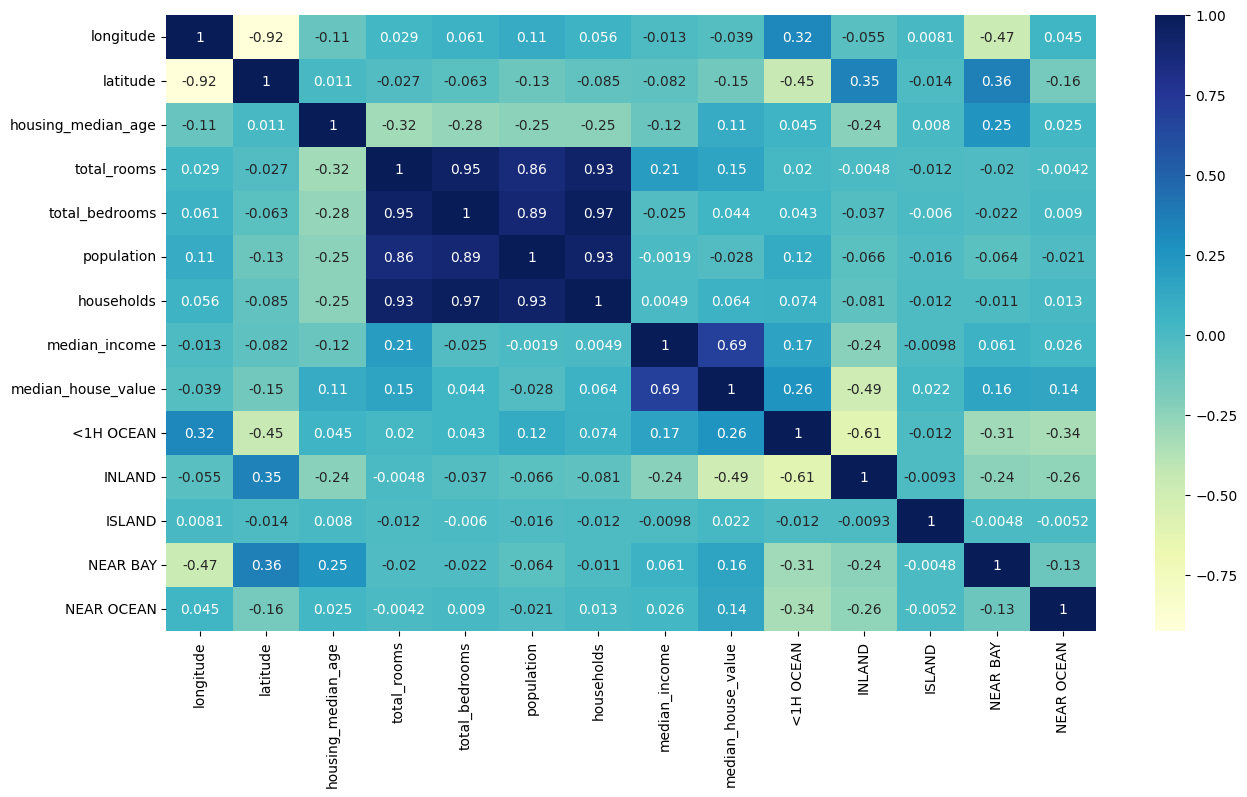

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1).corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

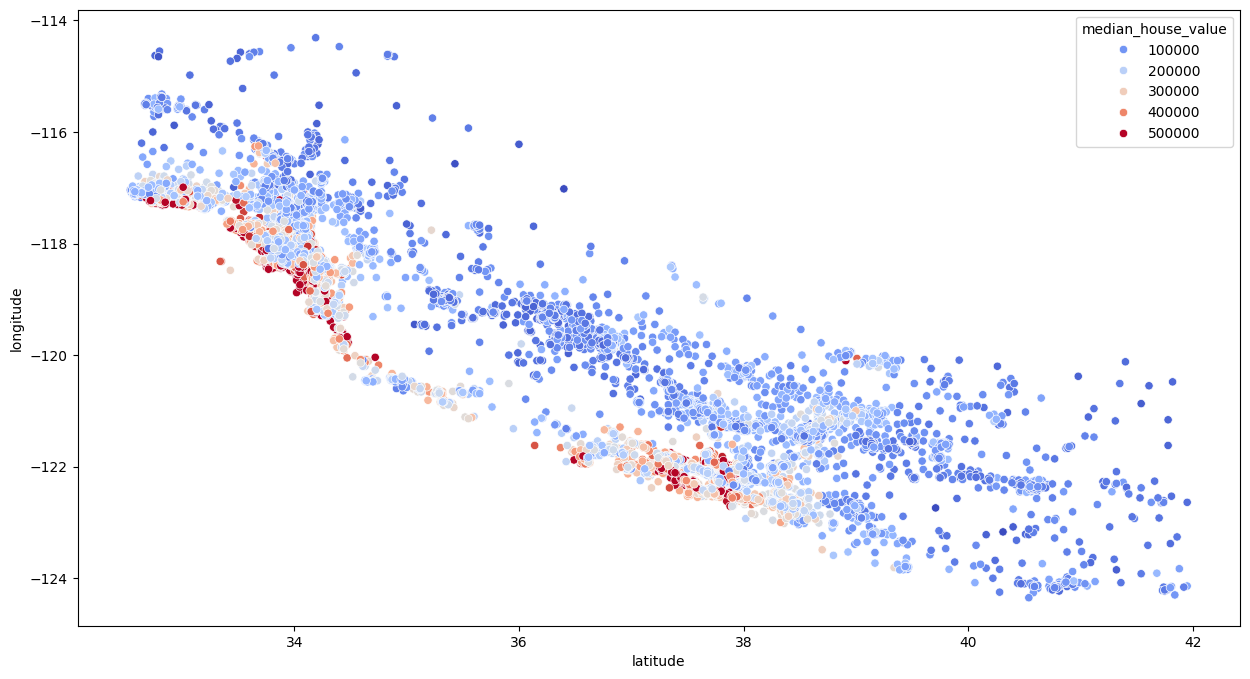

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [20]:
#Feature Engineering
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

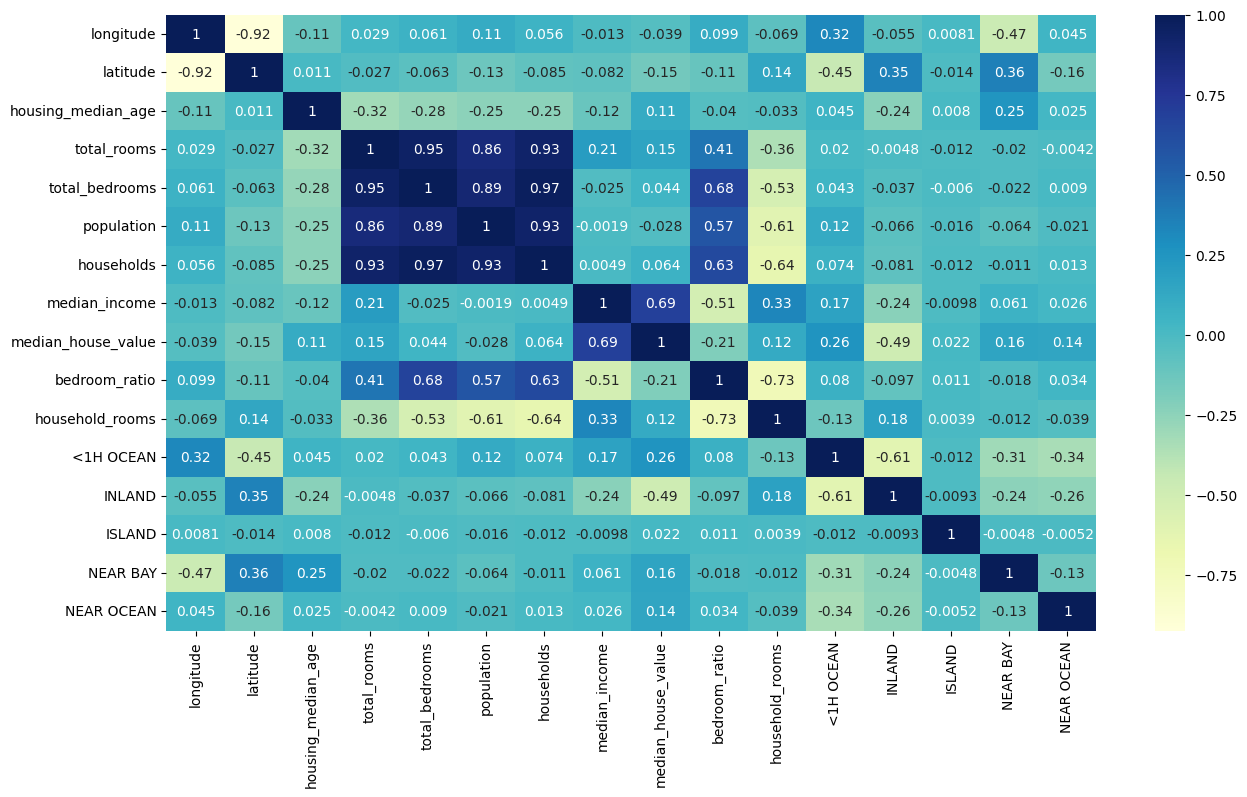

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1).corr(), annot=True, cmap='YlGnBu')

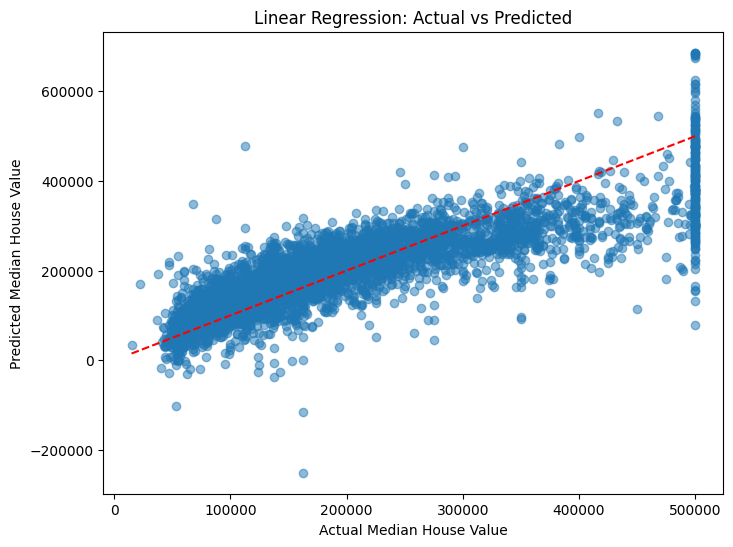

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for df in [X_train, X_test]:
    for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
        df[col] = np.log1p(df[col])
    df['bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']
    df['household_rooms'] = df['total_rooms'] / df['households']

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)



reg = LinearRegression()
reg.fit(X_train_s, y_train)

# Predicted values
y_pred = reg.predict(X_test_s)

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [23]:
reg.score(X_test_s, y_test)

0.6687407117584969

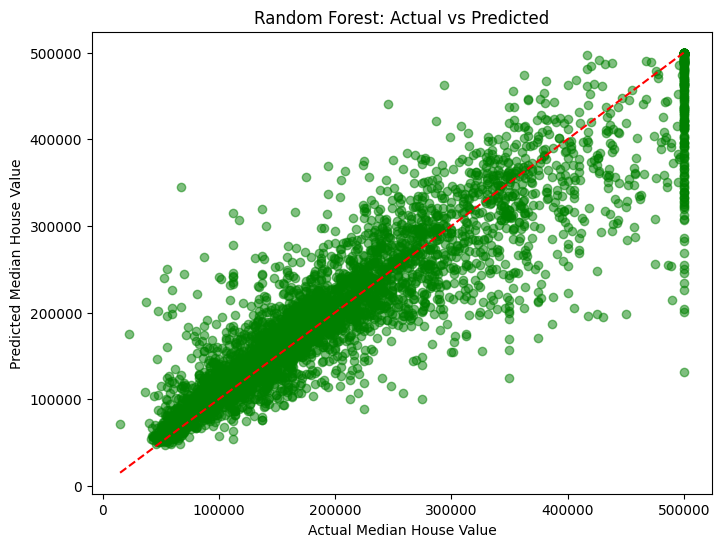

In [24]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_s, y_train)

y_pred_rf = rf.predict(X_test_s)

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

In [25]:
rf.score(X_test_s, y_test)

0.820610701134741